# COSC 2779 Deep learning: Assignment 2


## Data Exploration & Analysis



### Data Retrieval

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/My Drive/StanceDataset/

# Check current OS directory
!ls

/content/gdrive/My Drive/StanceDataset
test.csv  train.csv


In [ ]:
# Import Essential dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import tensorflow as tf

In [ ]:
!pip install nltk

import nltk

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
# Read train and test dataset.
with open('train.csv','r',encoding='ISO-8859-1') as f:
    train_data = pd.read_csv(f)

with open('test.csv','r',encoding='ISO-8859-1') as y:
    test_data = pd.read_csv(y)
    
    
f.close()
y.close()

In [ ]:
train_data.head(20)

Tweet  ... Sentiment
0   @tedcruz And, #HandOverTheServer she wiped cle...  ...       neg
1   Hillary is our best choice if we truly want to...  ...       pos
2   @TheView I think our country is ready for a fe...  ...       neg
3   I just gave an unhealthy amount of my hard-ear...  ...       neg
4   @PortiaABoulger Thank you for adding me to you...  ...       pos
5   Hillary can not win. Here's hoping the Dems of...  ...       neg
6   Respect FOR the law and respect BY the law Yes...  ...       pos
7   I don't want to be appointed to an Ambassador ...  ...       neg
8   #StopHillary2016 @HillaryClinton if there was ...  ...       neg
9   @HillaryClinton End lawless #ClintonFoundation...  ...       neg
10  Use your brain, keep Hillary out of the White ...  ...       neg
11  @HillaryClinton Hillary pandering with her log...  ...       neg
12  @readyforHRC @HillaryClinton #HillaryClinton, ...  ...       pos
13     @CiaraAntaya cuz you know I'm such a feminist   ...     other
14  2 million bogus followers on Twitter @HillaryC...  ...       neg
15  @lindasuhler : My name is Rebecca and my grand...  ...       pos
16  Where's the campaign store is the real questio...  ...       pos
17  It's a miracle, suddenly #Democrats don't mind...  ...       neg
18  @smileitsalicia @greekgummybear2 now i can liv...  ...       pos
19  Hillary doesn't want to put anyone in prison a...  ...       neg

[20 rows x 5 columns]

In [ ]:
test_data.head(20)
    

0     He who exalts himself shall      be humbled; a...
1     RT @prayerbullets: I remove Nehushtan -previou...
2     @Brainman365 @heidtjj @BenjaminLives I have so...
3     #God is utterly powerless without Human interv...
4     @David_Cameron   Miracles of #Multiculturalism...
5     This world needs a tight group hug. Tight enou...
6     Morality is not derived from religion, it prec...
7     A Godly husband  - knows you - trusts you - lo...
8     @SecularDutchess I'll be your huckleberry @Dea...
9     #BIBLE = Big Irrelevant Book of Lies and Exagg...
10    If only dreams were real, now it's gone. #Sing...
11    Happy Independence Day to America and her beau...
12    Let my house be built by wisdom and become str...
13    These days, the cool kids are atheists.  #free...
14    Next time you hear someone say that our Foundi...
15    #ILoveIslamBecause and v should love Islam bec...
16    Be a sinner and sin strongly, but more strongl...
17    #God > My fears God > My insecurities God 

In [ ]:

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText


train_data['Tweet'] = preprocess(train_data['Tweet'])

In [ ]:
train_data['Tweet']

0       @tedcruz And, #HandOverTheServer she wiped cle...
1       Hillary is our best choice if we truly want to...
2       @TheView I think our country is ready for a fe...
3       I just gave an unhealthy amount of my hard-ear...
4       @PortiaABoulger Thank you for adding me to you...
                              ...                        
2909    There's a law protecting unborn eagles, but no...
2910    I am 1 in 3... I have had an abortion #Abortio...
2911    How dare you say my sexual preference is a cho...
2912    Equal rights for those 'born that way', no rig...
2913    #POTUS seals his legacy w/ 1/2 doz wins. The #...
Name: Tweet, Length: 2914, dtype: object

In [ ]:

# Number of Stance
train_data['Stance'].unique()


array(['AGAINST', 'FAVOR', 'NONE'], dtype=object)

In [ ]:

# Number of Target Topic
train_data['Target'].unique()

array(['Hillary Clinton', 'Legalization of Abortion', 'Atheism',
       'Climate Change is a Real Concern', 'Feminist Movement'],
      dtype=object)

### Observe Stance Distribution for each target topic

In [ ]:
import seaborn as sns

def plotTopicDist(TARGET_TOPIC):
  index = 0

  counter = [0,0,0]


  for topic in train_data['Target']:
    if topic == TARGET_TOPIC:
      y = 0
      for stance in train_data['Stance'].unique():
        if stance == train_data['Stance'][index]:
          counter[y] += 1
        y+=1


    index+=1

  df = pd.DataFrame([{'x':'AGAINST','y':counter[0]},{'x':'FAVOUR','y':counter[1]},{'x':'NONE','y':counter[2]}])
  sns.barplot(x = 'x',
              y = 'y',
              data = df)

  plt.title("TARGET TOPIC: "+str(TARGET_TOPIC))

  plt.show()

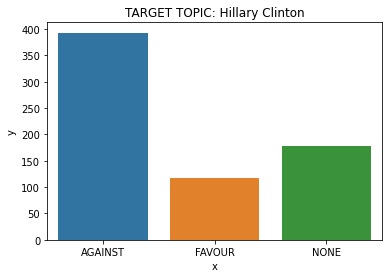

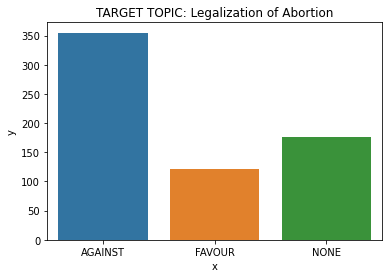

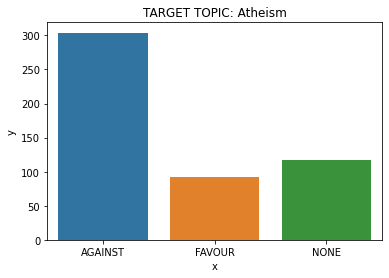

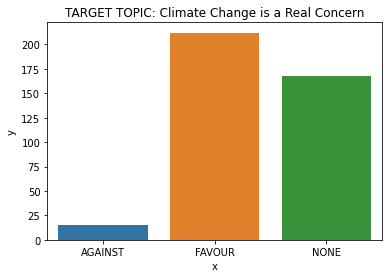

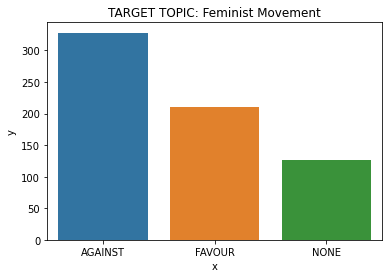

In [ ]:
# Observe all topic distributions

for topic in train_data['Target'].unique():
  plotTopicDist(topic)

### Visualizations of word distribution in Tweets

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

All frequencies, including STOPWORDS:
     Word  Frequency
0       #       6440
1   semst       2814
2       .       2265
3       @       1768
4     the       1557
5      to       1221
6       ,       1179
7       a        923
8      is        830
9      of        813
10      i        760
11    you        728
12      !        728
13    and        641
14     in        594
15    for        559
16      ?        492
17     's        484
18     it        468
19    n't        424


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

<Figure size 2880x1440 with 0 Axes>

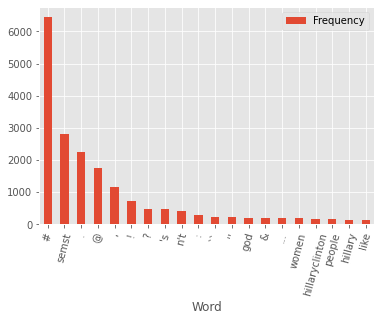

In [ ]:
top_N=20

txt = train_data['Tweet'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

plt.figure(figsize=(40,20))
rslt.plot.bar(rot=0)

plt.xticks(rotation=75)

### Word Cloud (Train Data)

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

def visualizeWordCloud(data):
  tweet_All = " ".join(review for review in data)

  plt.figure(figsize  = (30,30))
  # Create and generate a word cloud image:
  wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

  # Display the generated image:
  plt.imshow(wordcloud_ALL, interpolation='bilinear')
  plt.title('All Tweets', fontsize=30)
  plt.axis('off')


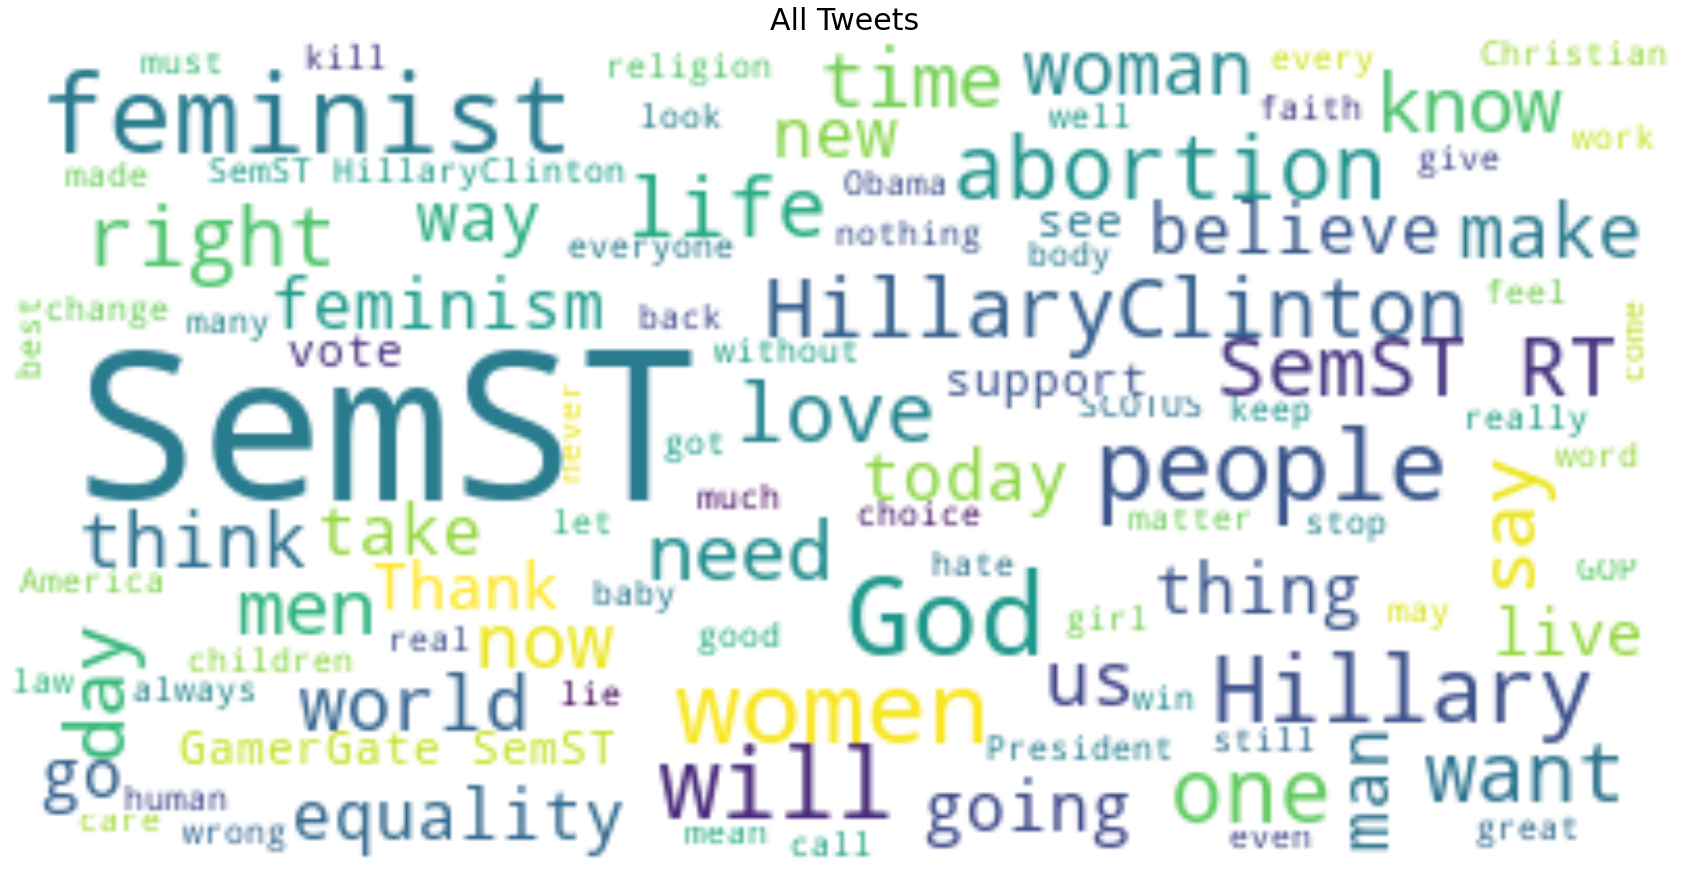

In [ ]:
visualizeWordCloud(train_data['Tweet'])

### Word Cloud (Test Data)

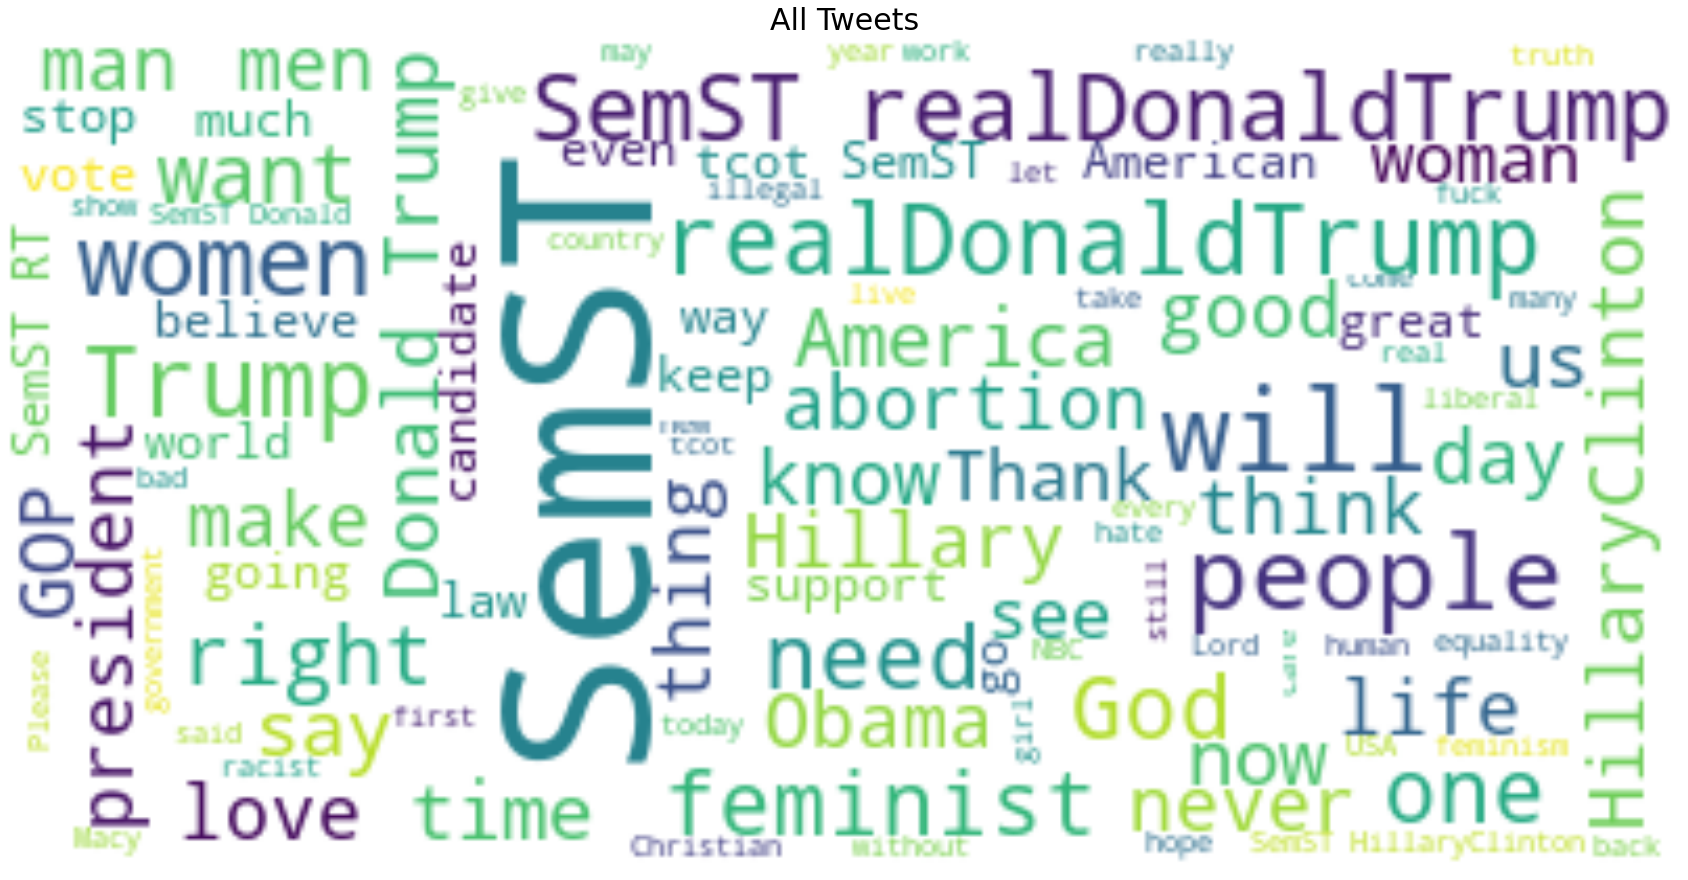

In [ ]:
visualizeWordCloud(test_data['Tweet'])

### Topic Specific WordCloud

**Hillary Clinton**

In [ ]:
def visualizeTopicWordCloud(TARGET_TOPIC):
  topicBool = train_data['Target'] == TARGET_TOPIC
  topic = train_data[topicBool]

  visualizeWordCloud(topic['Tweet'])

**Hillary Clinton**

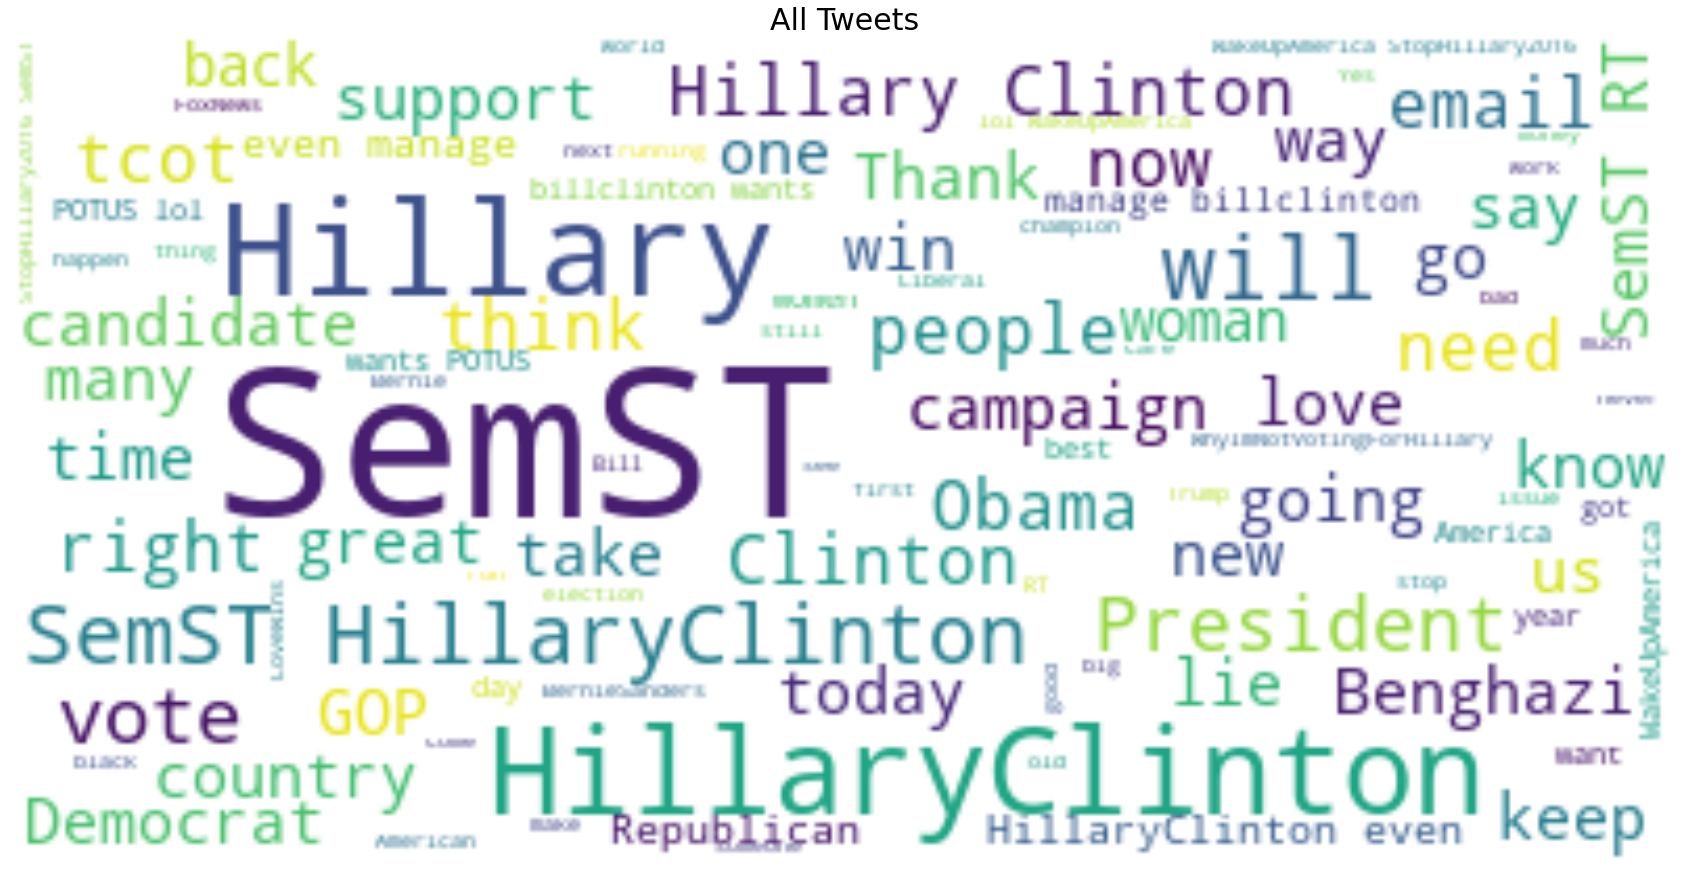

In [ ]:
visualizeTopicWordCloud("Hillary Clinton")

**Legalization of Abortion**

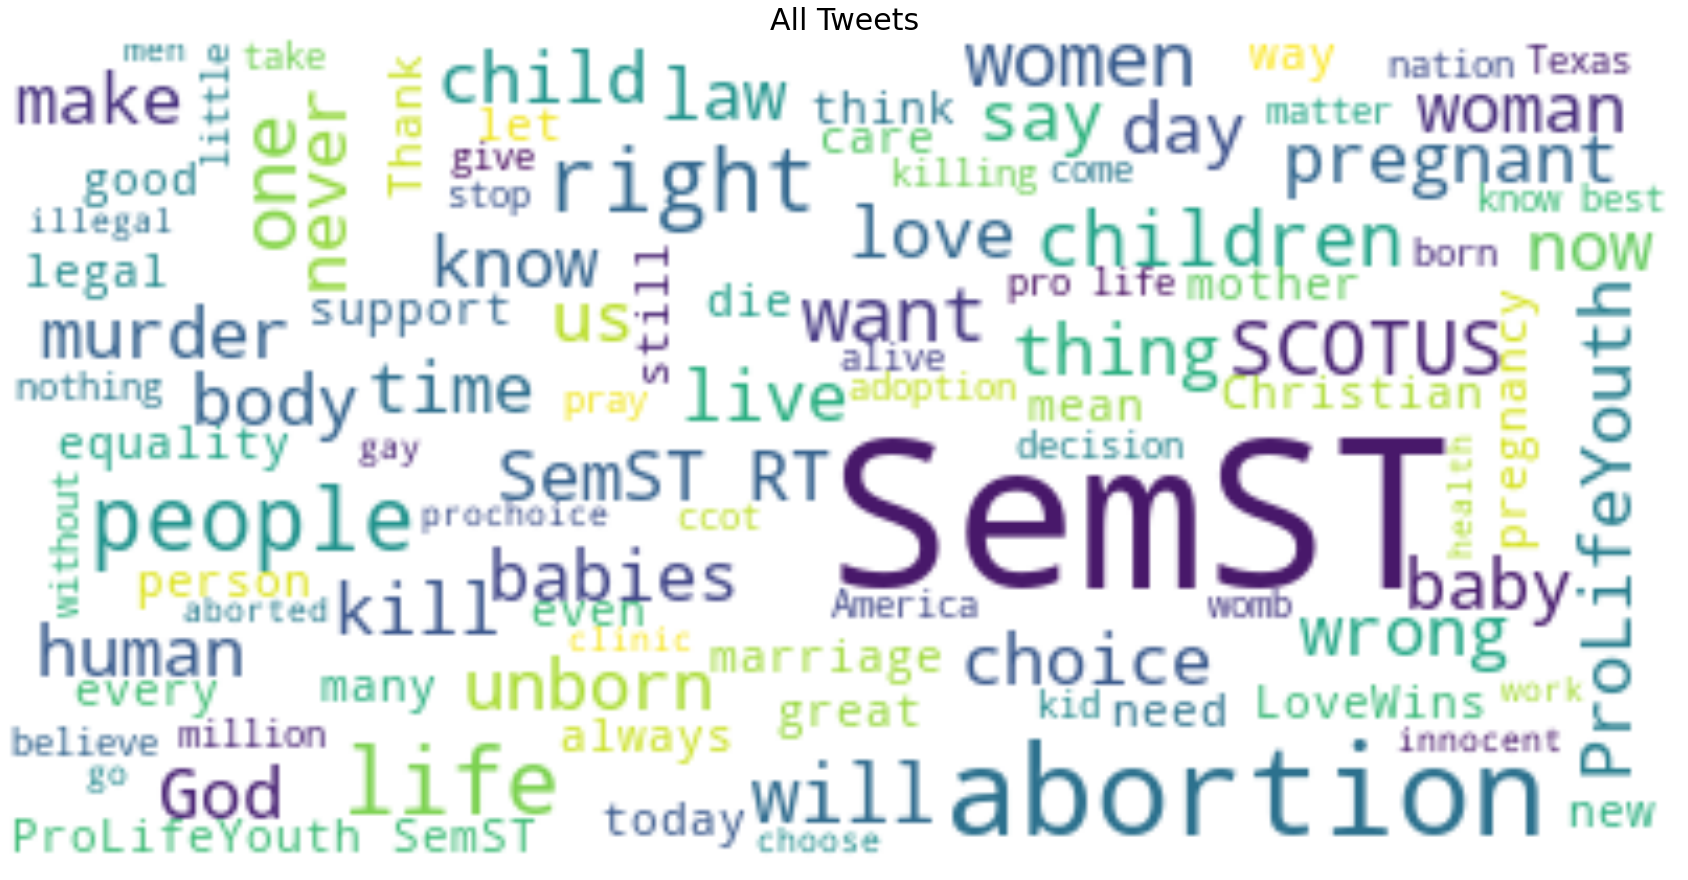

In [ ]:
visualizeTopicWordCloud('Legalization of Abortion')

**Atheism**

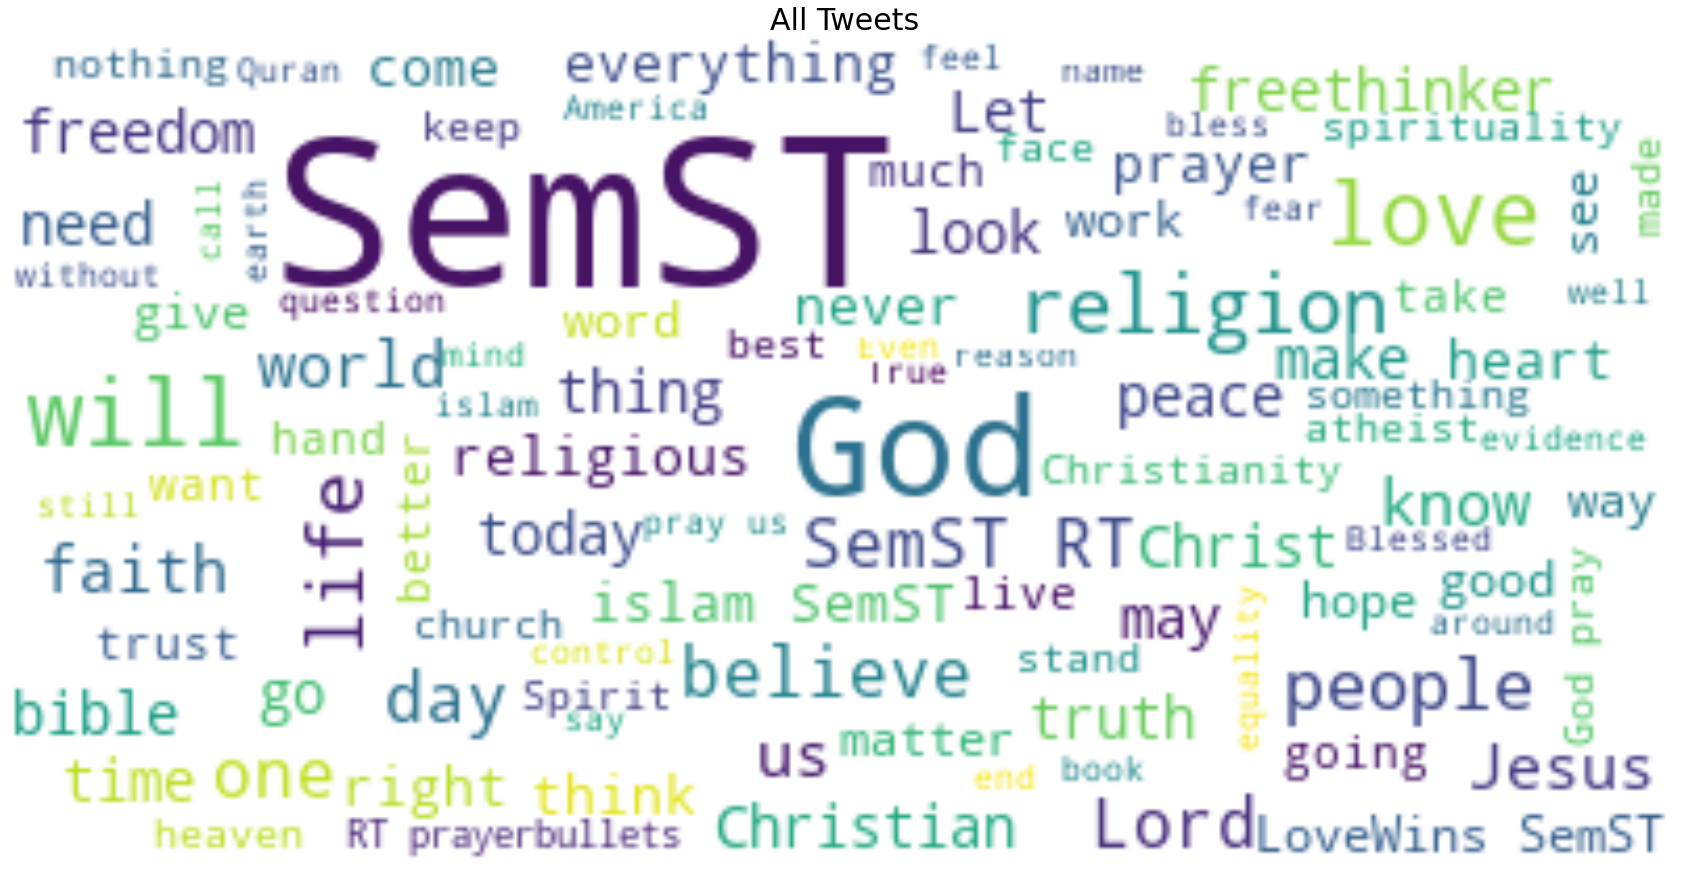

In [ ]:
visualizeTopicWordCloud('Atheism')

**Climate Change is a Real Concern**

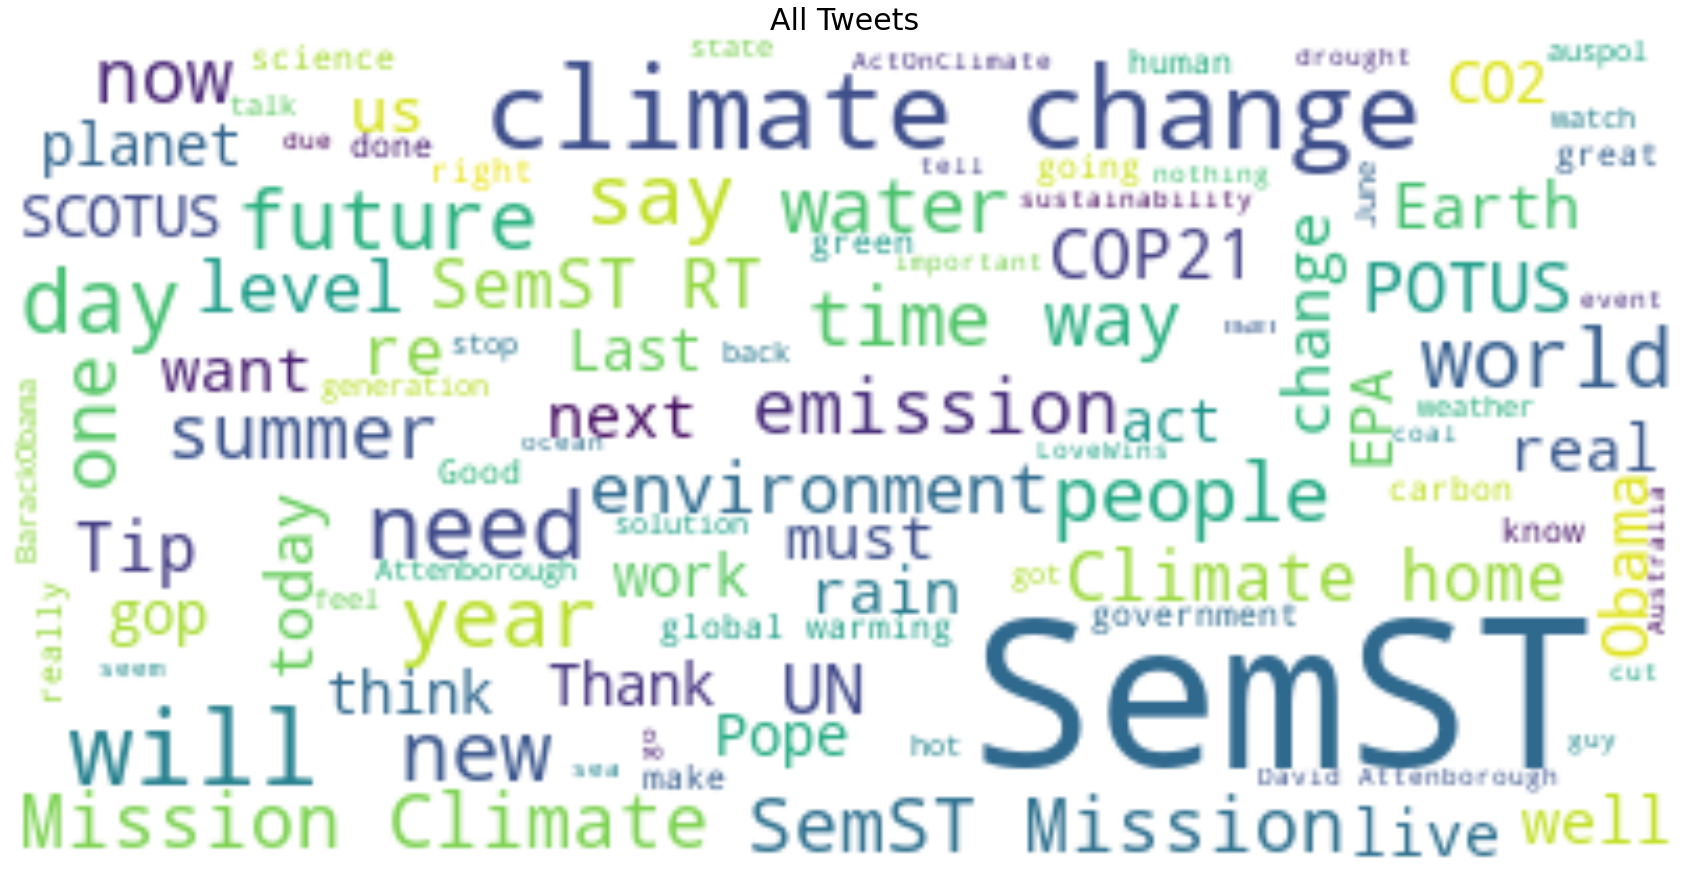

In [ ]:
visualizeTopicWordCloud('Climate Change is a Real Concern')

**Feminist Movement**

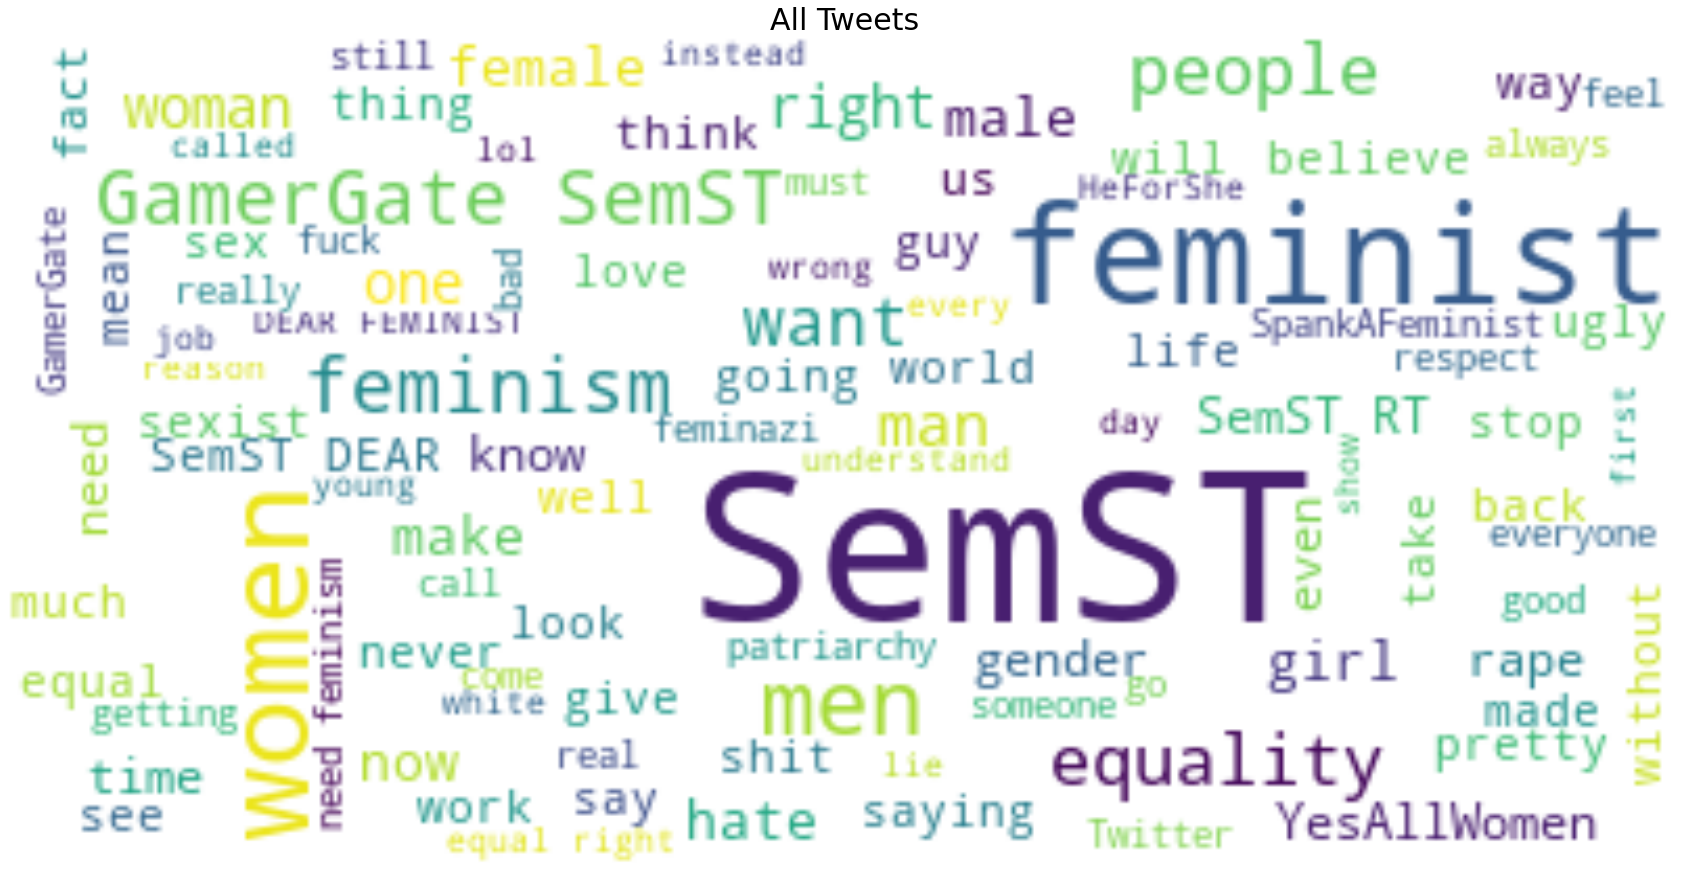

In [ ]:
visualizeTopicWordCloud('Feminist Movement')

In [ ]:

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
